In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Lets try to prove/disprove the Hypothesis.
First lets visualise it with the help of a box plot.

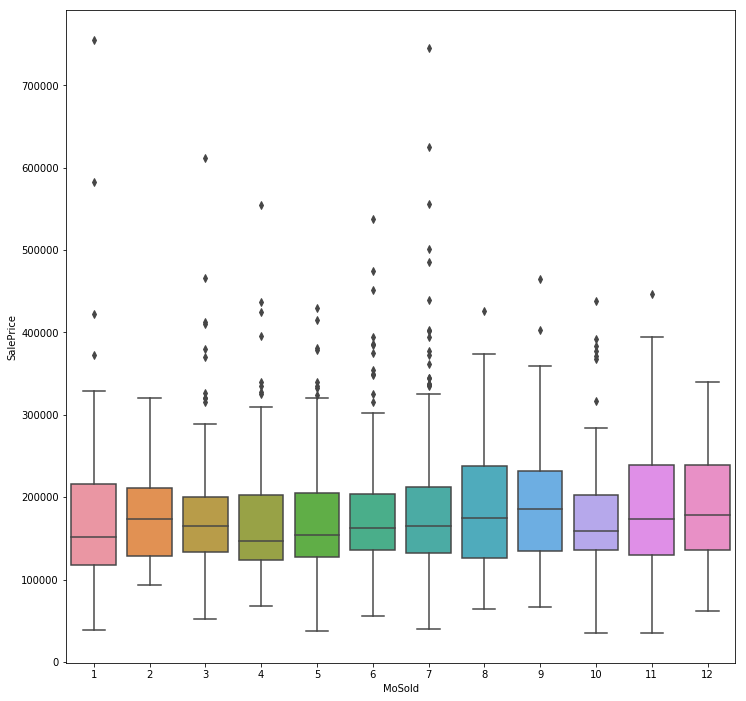

In [6]:
f, ax = plt.subplots(figsize=(12, 12))

sns.boxplot(x=df["MoSold"], y=df["SalePrice"])

In [7]:
df.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

All the groups are independent, have consistent variation and all even though sample sizes are not equal, they are greater than 30(not a small sample). So we can go ahead and use ANOVA.

In [8]:
mod = ols('SalePrice ~ MoSold',data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
MoSold       1.0  1.985183e+10  1.985183e+10  3.150172  0.076128
Residual  1458.0  9.188060e+12  6.301824e+09       NaN       NaN


We do reject H0 because 0.076 > 0.05. We do not have statistically significant evidence at a =0.05 to show that there our hypothesis isnt true, which makes sense, because saleprice doesnt depend on the month.

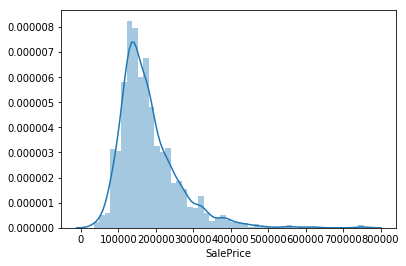

In [9]:
sns.distplot(df.SalePrice)

Let us build a base line model now by predicting mean of the distribution for every example in the test set.

In [10]:
test['SalePrice'] = pd.Series(df.SalePrice.mean()*np.ones((len(test),),dtype=int),index=test.index)

In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,180921.19589
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,180921.19589
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,180921.19589
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,180921.19589
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,180921.19589


Lets now encode categorical variables.

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)

In [13]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
numeric_df.drop(columns=['Id']);

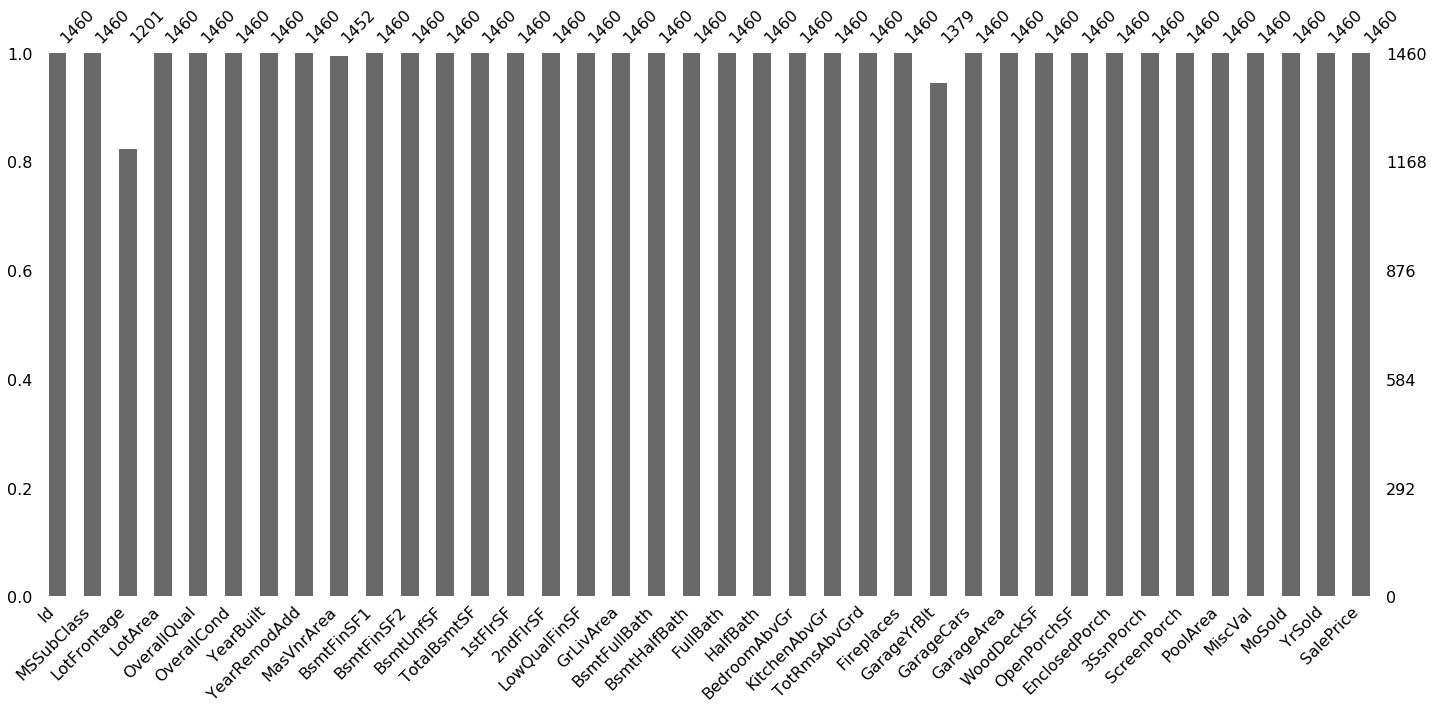

In [15]:
msno.bar(numeric_df)

Let's fill the missing values with their means

In [16]:
numeric_df.fillna(numeric_df.mean(), inplace=True)

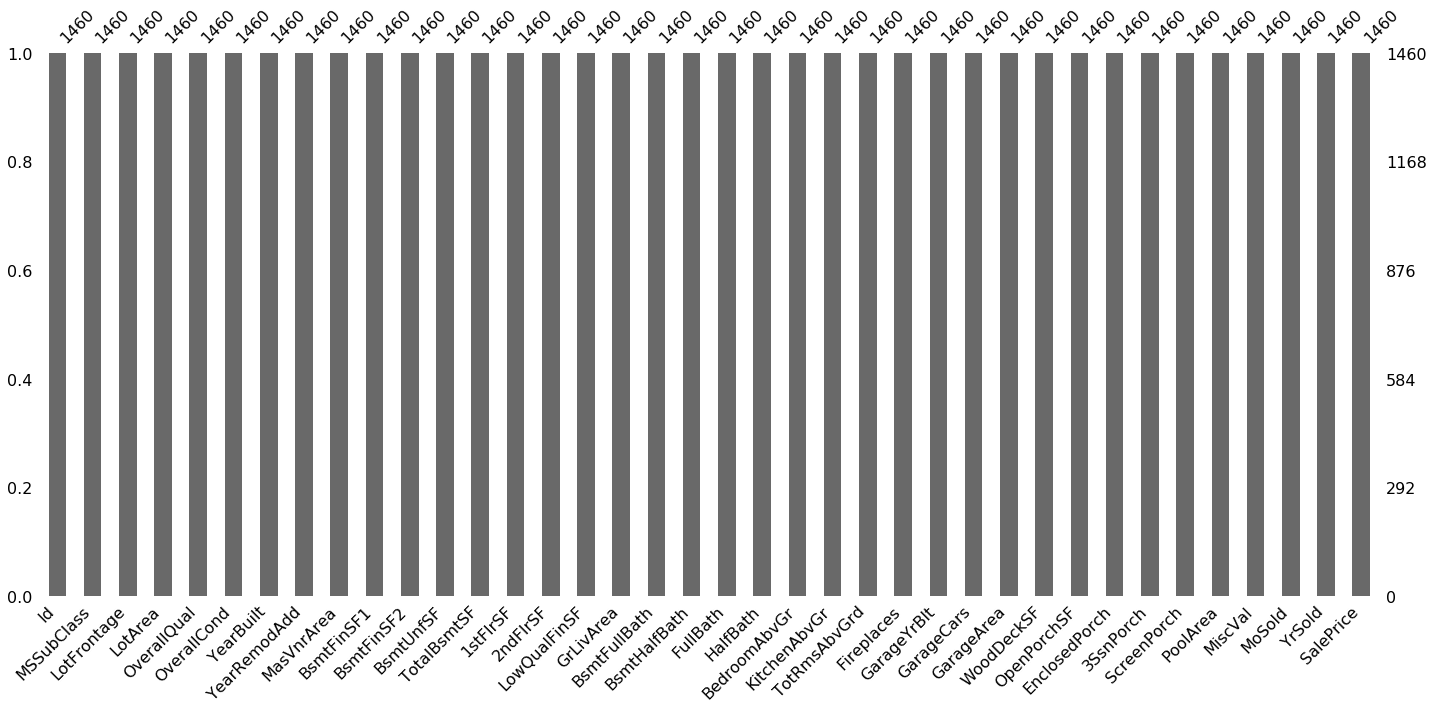

In [17]:
msno.bar(numeric_df)

Let us explore the numeric features.

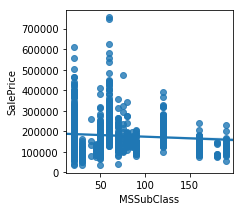

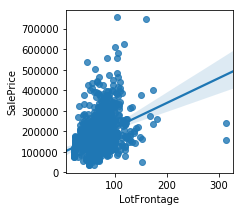

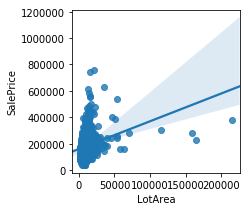

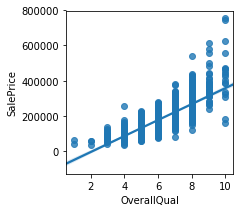

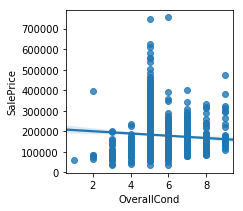

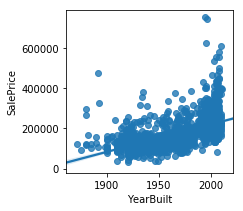

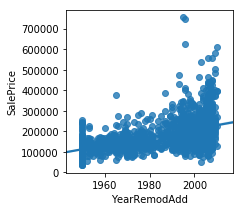

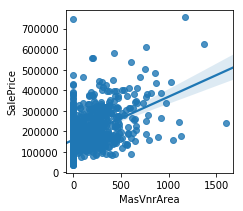

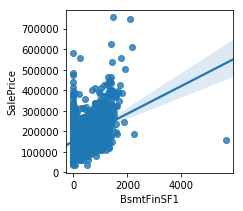

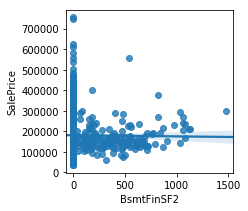

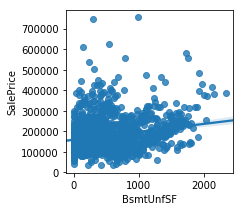

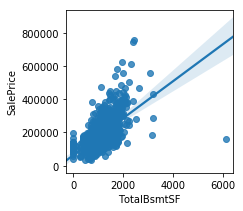

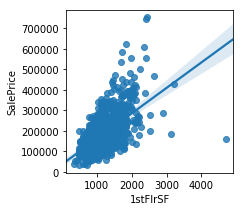

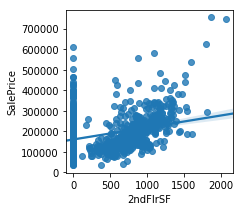

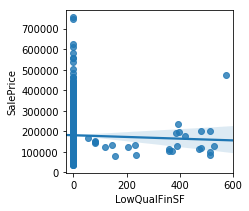

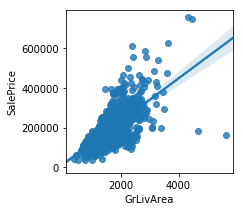

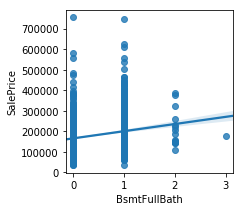

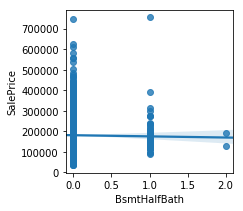

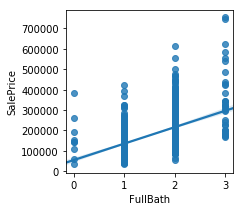

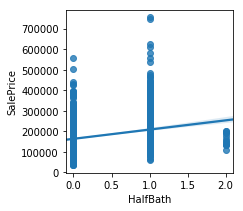

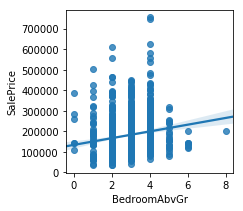

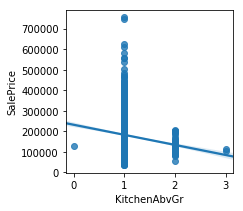

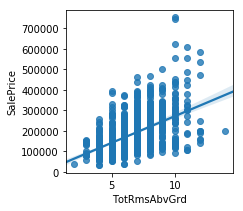

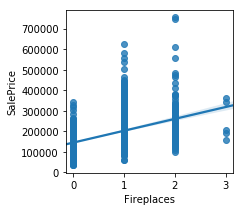

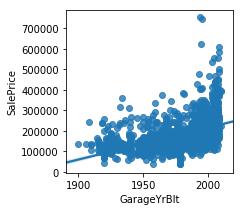

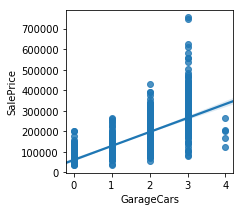

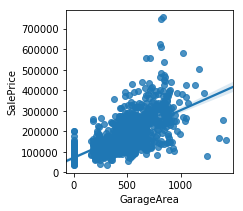

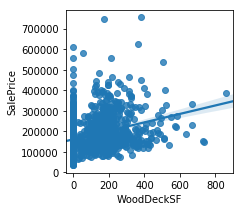

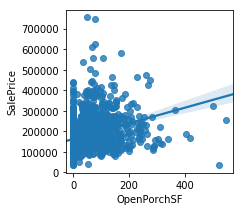

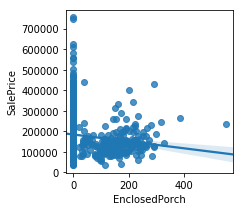

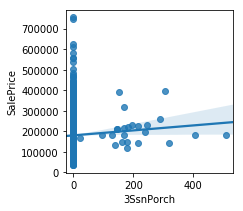

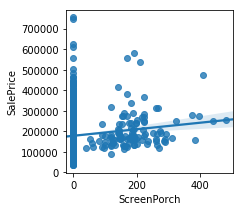

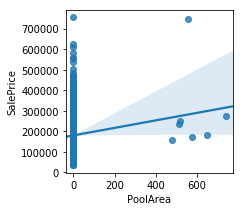

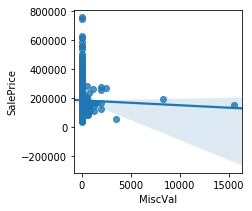

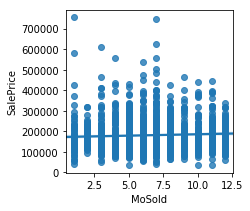

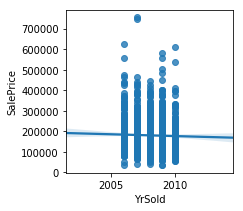

In [18]:
for i in numeric_df.columns:
    if((i=='Id') | (i=='SalePrice')):
        continue
    
    f, ax = plt.subplots(figsize=(3, 3))

    sns.regplot(x=numeric_df[i], y=numeric_df["SalePrice"], fit_reg=True)
    #sns.plt.show()


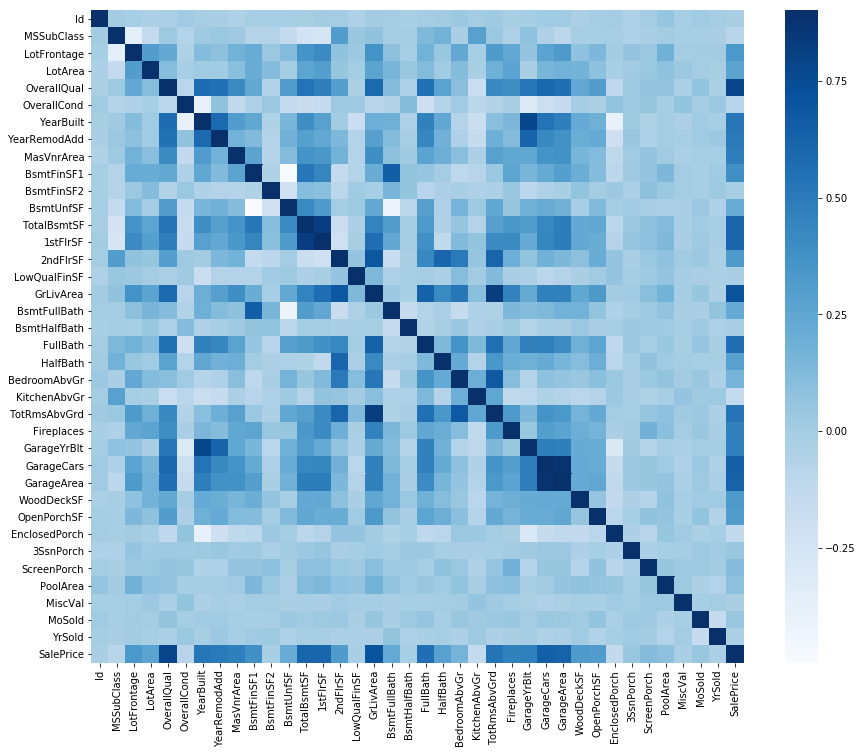

In [19]:
corr = numeric_df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)


Let us look at TotalBsmtSF, and remove its outlier in the above scatter plot.

In [20]:
numeric_df.drop(numeric_df[(numeric_df['SalePrice']<250000) & (numeric_df['TotalBsmtSF']>4000)].index,inplace=True)

For garage cars, there are only 4 examples with 4 and they are abnormally low which doesnt explain the general case so lets remove them.

In [21]:
numeric_df.drop(numeric_df[(numeric_df['GarageCars']>3)].index,inplace=True)

In overall quality lets remove the single outlier, at overall quality=4, with such a huge price. This might mean that the buyer might've been fooled and doesn't represent the general population.

In [22]:
numeric_df.drop(numeric_df[(numeric_df['SalePrice']>200000) & (numeric_df['OverallQual']<5)].index,inplace=True)

Garage area and garage cars are almost same, so lets use garage cars.
GrLivArea is a good feature, so lets remove its 2 outliers.

In [23]:
numeric_df.drop(numeric_df[(numeric_df['SalePrice']<300000) & (numeric_df['GrLivArea']>4000)].index,inplace=True)

Lets create a new feature TotalSF which is the sum of Sf of both the floors.

In [24]:
numeric_df['TotalSF']=numeric_df['1stFlrSF']+numeric_df['2ndFlrSF']

Next let us see TotRmsAbvGrd and remove the single outlier with many rooms and exceptionally low price because this doesnt represent our general distribution.

In [25]:
numeric_df.drop(numeric_df[(numeric_df['TotRmsAbvGrd']>12)].index,inplace=True)

Regarding bathrooms, let us create a new feature.

In [26]:
numeric_df['TotalBath']=numeric_df['FullBath']+numeric_df['HalfBath']*0.5

As we shouldnt standardize categorical variables lets make a list of features which we should standardize.T

Let us create a new feature, years_since_remodel.

In [27]:
numeric_df['years_since_remodel']=numeric_df['YrSold']-numeric_df['YearRemodAdd']

In [28]:
numeric_df_columns=numeric_df.columns

In [29]:
numeric_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,TotalBath,years_since_remodel
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,2,2008,208500,1710,2.5,5
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,5,2007,181500,1262,2.0,31
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,9,2008,223500,1786,2.5,6
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,2,2006,140000,1717,1.0,36
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,12,2008,250000,2198,2.5,8


To fit the Linear regression algo, lets finalise the features.

In [30]:
features=['YearBuilt','years_since_remodel','TotalBath','TotRmsAbvGrd','TotalSF','GrLivArea','OverallQual','GarageCars','TotalBsmtSF','Fireplaces']

In [31]:
final_df=numeric_df[features]

In [32]:
X=final_df.values
y=numeric_df['SalePrice'].values

Let us first make a cross validation_set.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_train_pred=(reg.predict(X_train))
y_val_pred=(reg.predict(X_val))
print(reg.score(X_val,y_val))
print(reg.score(X_train,y_train))

0.8048441372532114
0.8290767081555799


Let us now plot the residual vs fitted plot.

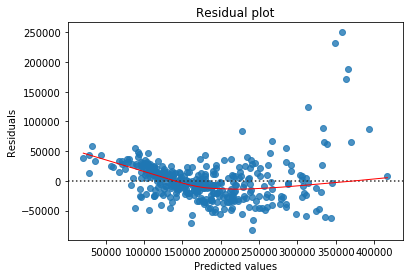

In [35]:
# fit regression model, using statsmodels GLM uses a different method but gives the same results
#model = sm.GLM(y, x, family=sm.families.Gaussian()).fit()
# seaborn residual plot
sns.residplot(y_val_pred, y_val, lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

In the example, the outcome variable has a quadratic relationship with its covariate, Y=β0+β1X+β2X2, but the regression specification only allows for a linear relationship. Here, the fitted versus residual plot shows a fairly strong sign of non-linearity with an upside down "U" shape. This is because the second order term of X has a negative relationship with Y.So lets try polynomial regression.

In [36]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_val_poly=polynomial_features.fit_transform(X_val)
reg_poly=LinearRegression().fit(X_train_poly, y_train)
print(reg_poly.score(X_train_poly,y_train))
print(reg_poly.score(X_val_poly,y_val))

0.897637521595061
0.8461241489841004


The model is working quite well, now let us pre process the test set and predict it.

In [37]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_test = test.select_dtypes(include=numerics)

In [38]:
numeric_test.drop(columns=['Id']);

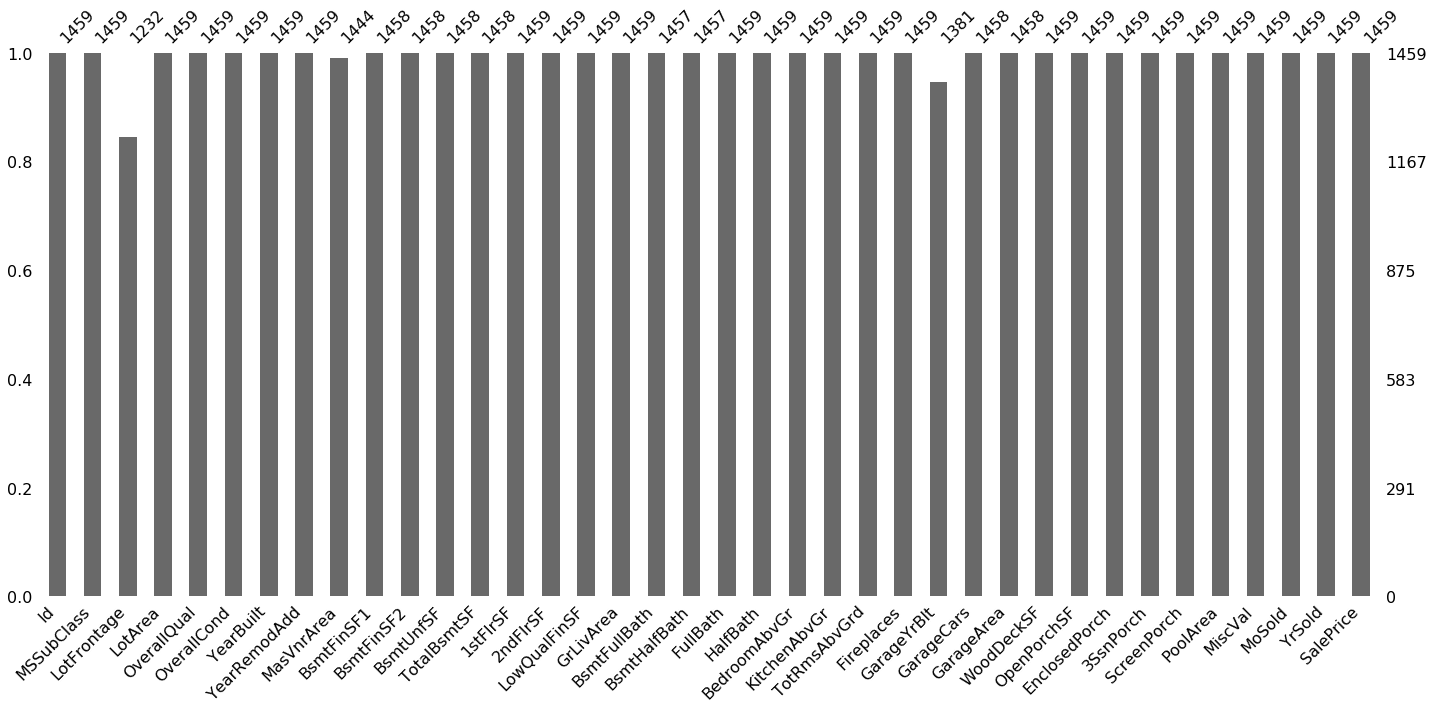

In [39]:
msno.bar(numeric_test)

In [40]:
numeric_test.fillna(numeric_df.mean(), inplace=True)

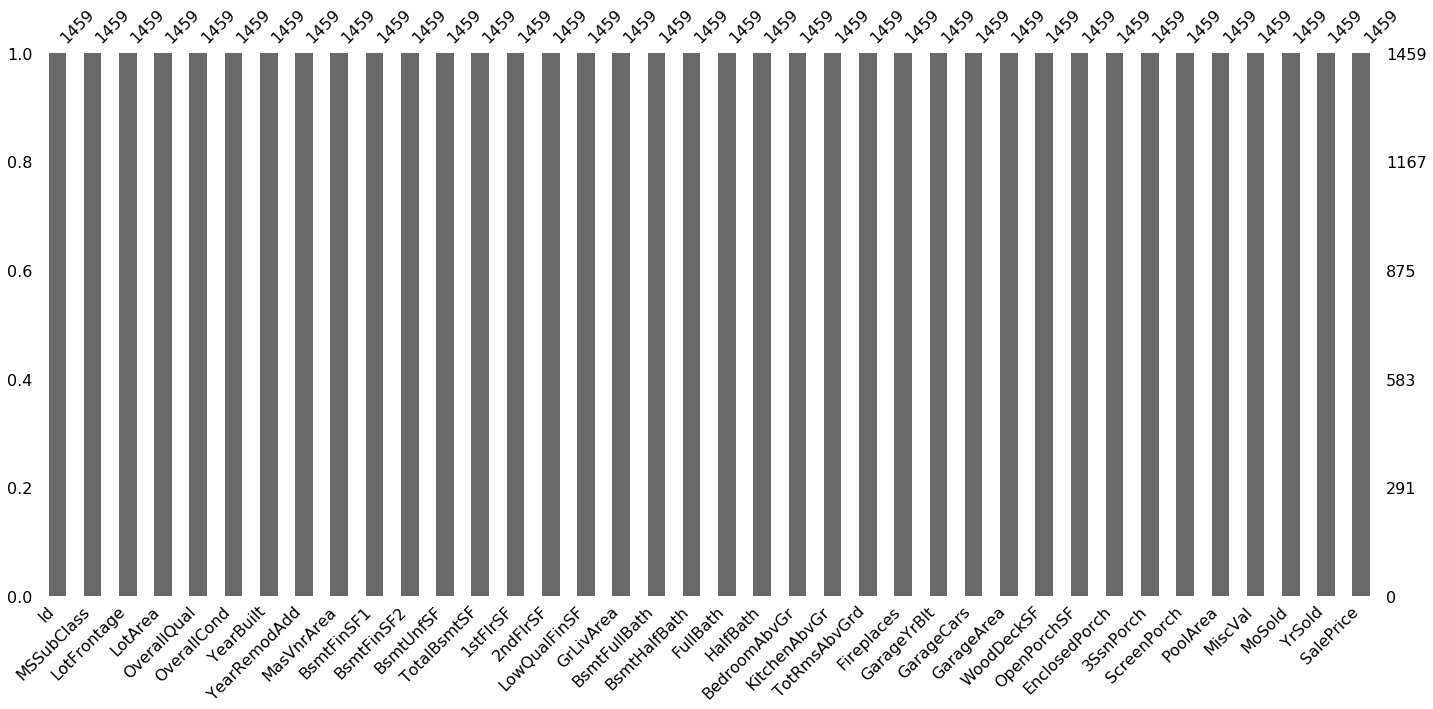

In [41]:
msno.bar(numeric_test)

In [42]:
numeric_test['TotalSF']=numeric_test['1stFlrSF']+numeric_test['2ndFlrSF']

In [43]:
numeric_test['TotalBath']=numeric_test['FullBath']+numeric_test['HalfBath']*0.5

In [44]:
numeric_test['years_since_remodel']=numeric_test['YrSold']-numeric_test['YearRemodAdd']

In [45]:
numeric_test_columns=numeric_test.columns

In [46]:
numeric_test.columns=numeric_df_columns

In [47]:
numeric_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,TotalBath,years_since_remodel
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,2,2008,208500,1710,2.5,5
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,5,2007,181500,1262,2.0,31
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,9,2008,223500,1786,2.5,6
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,2,2006,140000,1717,1.0,36
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,12,2008,250000,2198,2.5,8


In [48]:
final_df_test=numeric_test[features]

In [49]:
X_test=final_df_test.values
X_test_poly=polynomial_features.fit_transform(X_test)

In [50]:
y_test_pred=(reg_poly.predict(X_test_poly))

In [51]:
y_test_pred

array([113104.62844849, 136524.043396  , 174504.30496216, ...,
       163266.9881897 , 113483.29873657, 233294.41119385])